# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [61]:
# A bit of setup

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from implementations.b_neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `implementations/b_neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [62]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = np.float32(10 * np.random.randn(num_inputs, input_size))
    y = np.array([0, 1, 2, 2, 1], dtype=np.float32)
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `implementations/neural_net.py` and look at the method `TwoLayerNet.compute_scores`. 

Implement the forward pass which uses the weights and biases to compute the scores for all inputs.

In [63]:
nclasses = 3
session = tf.Session()
session.run(tf.global_variables_initializer())
scores = session.run(net.compute_scores(X, nclasses))

print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.array([[-0.8048996, -1.2701722,  -0.69626933],
 [-0.16263291, -1.1806408,  -0.4659379, ],
 [-0.50724095, -1.006151,   -0.843255,  ],
 [-0.14552905, -0.4789041,  -0.5218529, ],
 [ 0.00391591, -0.11607306, -0.14394382]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.8123374  -1.2765462  -0.7033599 ]
 [-0.17129679 -1.1880331  -0.47310448]
 [-0.5159048  -1.0135431  -0.8504216 ]
 [-0.15419292 -0.4862964  -0.5290195 ]
 [-0.00618732 -0.12435262 -0.15226948]]

correct scores:
[[-0.8048996  -1.2701722  -0.69626933]
 [-0.16263291 -1.1806408  -0.4659379 ]
 [-0.50724095 -1.006151   -0.843255  ]
 [-0.14552905 -0.4789041  -0.5218529 ]
 [ 0.00391591 -0.11607306 -0.14394382]]

Difference between your scores and correct scores:
0.11727892849449162


# Forward pass: compute loss
Implement the function `softmax_loss` that computes the data loss.

In [64]:
objective = net.compute_objective(X, y, reg=0.05)
np_obj = session.run(objective)


correct_objective = 6.3694286

# should be very small, we get < 1e-7
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(np_obj - correct_objective)))

Difference between your loss and correct loss:
5.06564065329895


# Backward pass
Tensorflow takes care of the backpropagation, so we are ready to train the neural network!

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

iteration 0 / 100: loss 1.265861
iteration 10 / 100: loss 0.055501
iteration 20 / 100: loss 0.014764
iteration 30 / 100: loss 0.007793
iteration 40 / 100: loss 0.005203
iteration 50 / 100: loss 0.003851
iteration 60 / 100: loss 0.003028
iteration 70 / 100: loss 0.002481
iteration 80 / 100: loss 0.002093
iteration 90 / 100: loss 0.001804
Final training loss:  0.0016020113


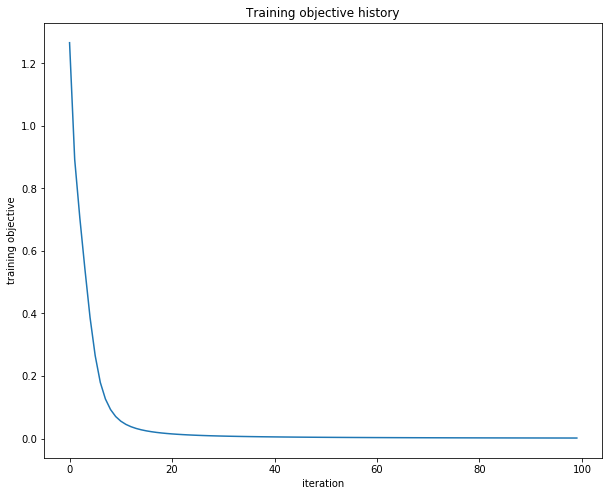

In [65]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=True)

print('Final training loss: ', stats['objective_history'][-1])

# plot the loss history
plt.plot(stats['objective_history'])
plt.xlabel('iteration')
plt.ylabel('training objective')
plt.title('Training objective history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [66]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

X_train = np.float32(X_train)
X_val = np.float32(X_val)
X_test = np.float32(X_test)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [67]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=0.001, learning_rate_decay=0.10,
            reg=0.25, verbose=True)

# Predict on the validation set
print("Training samples shape")
print(X_val.shape)
# val_acc = np.float32(np.equal(net.predict(X_val), y_val)).mean()
# print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302957
iteration 10 / 1000: loss 2.302562
iteration 20 / 1000: loss 2.298831
iteration 30 / 1000: loss 2.249421
iteration 40 / 1000: loss 2.153742
iteration 50 / 1000: loss 2.116302
iteration 60 / 1000: loss 2.021047
iteration 70 / 1000: loss 2.059564
iteration 80 / 1000: loss 1.983192
iteration 90 / 1000: loss 2.004445
iteration 100 / 1000: loss 1.895840
iteration 110 / 1000: loss 1.882591
iteration 120 / 1000: loss 1.775702
iteration 130 / 1000: loss 1.672171
iteration 140 / 1000: loss 1.934097
iteration 150 / 1000: loss 1.830883
iteration 160 / 1000: loss 1.788523
iteration 170 / 1000: loss 1.766076
iteration 180 / 1000: loss 1.838464
iteration 190 / 1000: loss 1.854777
iteration 200 / 1000: loss 1.744500
iteration 210 / 1000: loss 1.833372
iteration 220 / 1000: loss 1.762981
iteration 230 / 1000: loss 1.648085
iteration 240 / 1000: loss 1.862428
iteration 250 / 1000: loss 1.683534
iteration 260 / 1000: loss 1.793770
iteration 270 / 1000: loss 1.925544
ite

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.4 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

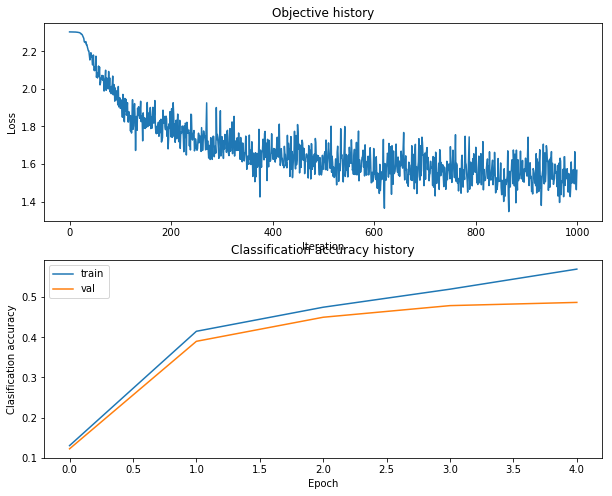

In [70]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['objective_history'])
plt.title('Objective history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

[[-1.4402027e-03 -3.9065094e-04 -2.1406035e-03 ...  4.7578802e-04
   2.3439918e-04 -6.9827563e-04]
 [ 2.1554979e-04 -4.8743546e-05 -2.6298636e-03 ... -8.5958024e-04
  -4.8725921e-04 -7.2246752e-05]
 [ 1.0829384e-03 -1.2808916e-03 -4.6467860e-03 ... -1.7811459e-03
   2.5452397e-04  1.5346558e-03]
 ...
 [ 2.2071698e-03 -2.2398360e-04  1.7380005e-05 ... -2.6842728e-04
  -4.0072300e-03 -1.5293823e-03]
 [ 1.6193406e-03 -2.5905538e-04  9.7279035e-04 ... -6.7366200e-04
  -1.5074668e-03 -1.1282769e-03]
 [-5.7520065e-04 -1.7213945e-03 -1.1488162e-03 ... -4.0043844e-04
  -2.5936044e-04 -9.7861490e-04]]


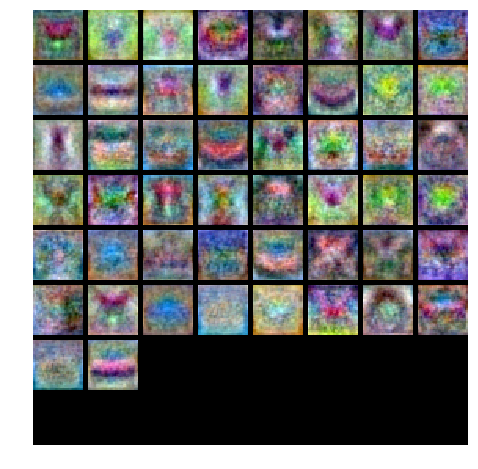

In [71]:
from vis_utils import visualize_grid

# Visualize the weights of the network
sess = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

def show_net_weights(learned_params):
    W1 = learned_params['W1']
    print(W1)
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

learned_params = net.get_learned_parameters()
show_net_weights(learned_params)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [81]:
best_net = TwoLayerNet(input_size, hidden_size, num_classes) # store the best model into this 


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 600: objective 460.516998
iteration 100 / 600: objective 352.643097
iteration 200 / 600: objective 324.330475
iteration 300 / 600: objective 340.503876
iteration 400 / 600: objective 337.472504
iteration 500 / 600: objective 307.877228
(1000, 3072)
Validation accuracy:  0.462
iteration 0 / 600: objective 460.513519
iteration 100 / 600: objective 352.437836
iteration 200 / 600: objective 326.896423
iteration 300 / 600: objective 345.476593
iteration 400 / 600: objective 333.102600
iteration 500 / 600: objective 316.046875
(1000, 3072)
Validation accuracy:  0.485
iteration 0 / 600: objective 460.518921
iteration 100 / 600: objective 350.255249
iteration 200 / 600: objective 326.098907
iteration 300 / 600: objective 341.272675
iteration 400 / 600: objective 323.019562
iteration 500 / 600: objective 307.397797
(1000, 3072)
Validation accuracy:  0.479
iteration 0 / 600: objective 460.534576
iteration 100 / 600: objective 351.024719
iteration 200 / 600: objective 332.133026
ite

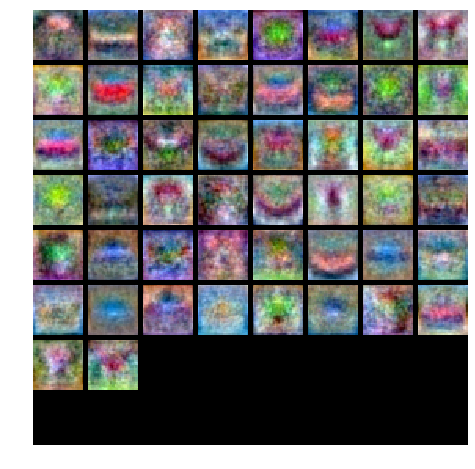

In [82]:
# visualize the weights of the best network
learned_params = net.get_learned_parameters()
show_net_weights(learned_params)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [72]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

NameError: name 'best_net' is not defined

**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*